In [4]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import time

### Load File

In [5]:
df_fan_features = pd.read_csv("../Features/df_fan_feature.csv")
df_fan_target = pd.read_csv("../Features/df_fan_target.csv")
X = df_fan_features
y = df_fan_target.values.ravel()

### Slit Dataset -> Train, Test and Validation

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.05, 
    random_state=69
)

### Model fitting and training

In [32]:
start = time.process_time()
########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 50, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', 
    random_state=42  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

print(time.process_time() - start)

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.05%
7.703125


### Metrics

In [35]:
start = time.process_time()
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(time.process_time() - start)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       880
           1       0.93      0.99      0.96      2450

    accuracy                           0.94      3330
   macro avg       0.95      0.90      0.92      3330
weighted avg       0.94      0.94      0.94      3330

0.078125


In [36]:
y_pred_val = model.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       167
           1       0.94      0.99      0.97       499

    accuracy                           0.95       666
   macro avg       0.96      0.90      0.93       666
weighted avg       0.95      0.95      0.95       666



### More Metrics

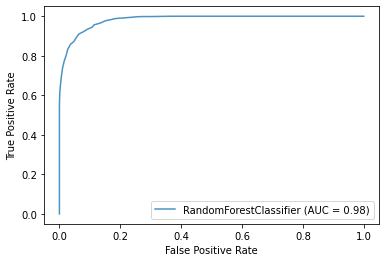

In [37]:
#ROC Curve
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)

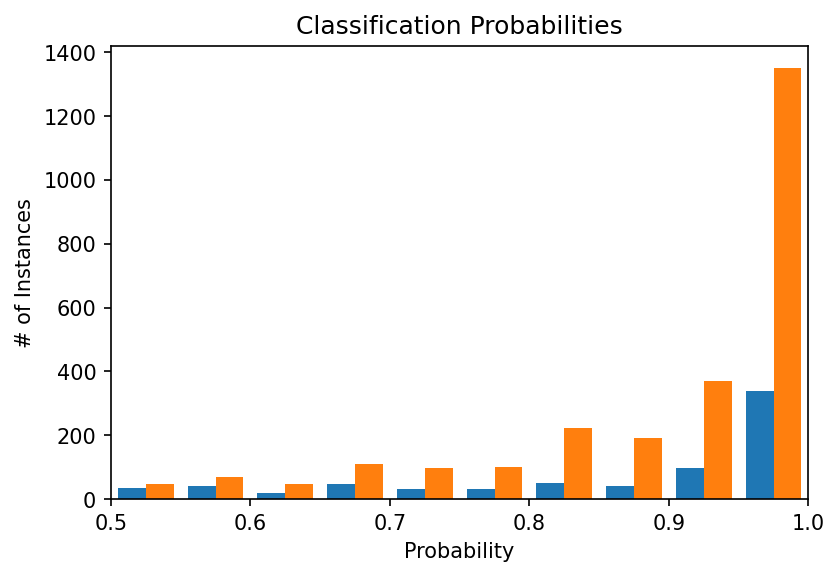

In [38]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

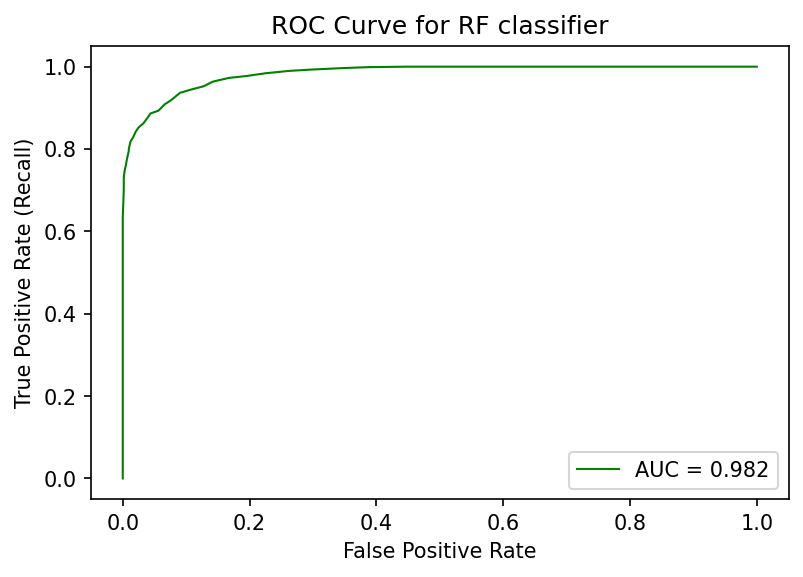

In [39]:
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

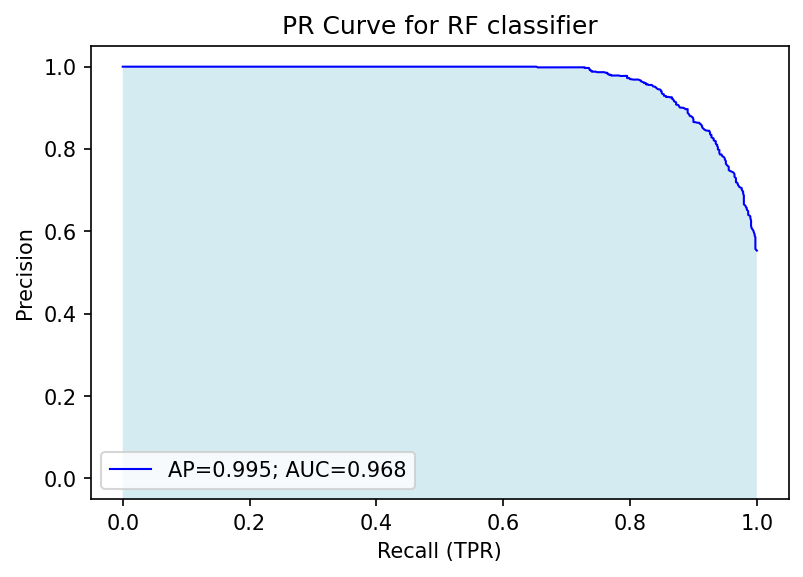

In [25]:
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()